In [7]:
%load_ext autoreload
%autoreload 2

import sys; sys.path.append('../')

from austen import Logger
from pathlib import Path
import joblib
import networkx as nx
import matplotlib.pyplot as plt

from bike.model.graph import Graph
from bike.util.snap import snap_vertices, get_snapped_ids
from bike.util.preprocessing import smooth_graph, remove_snapped
from copy import deepcopy
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Vertices: 100%|██████████| 22/22 [00:00<00:00, 71.20it/s]


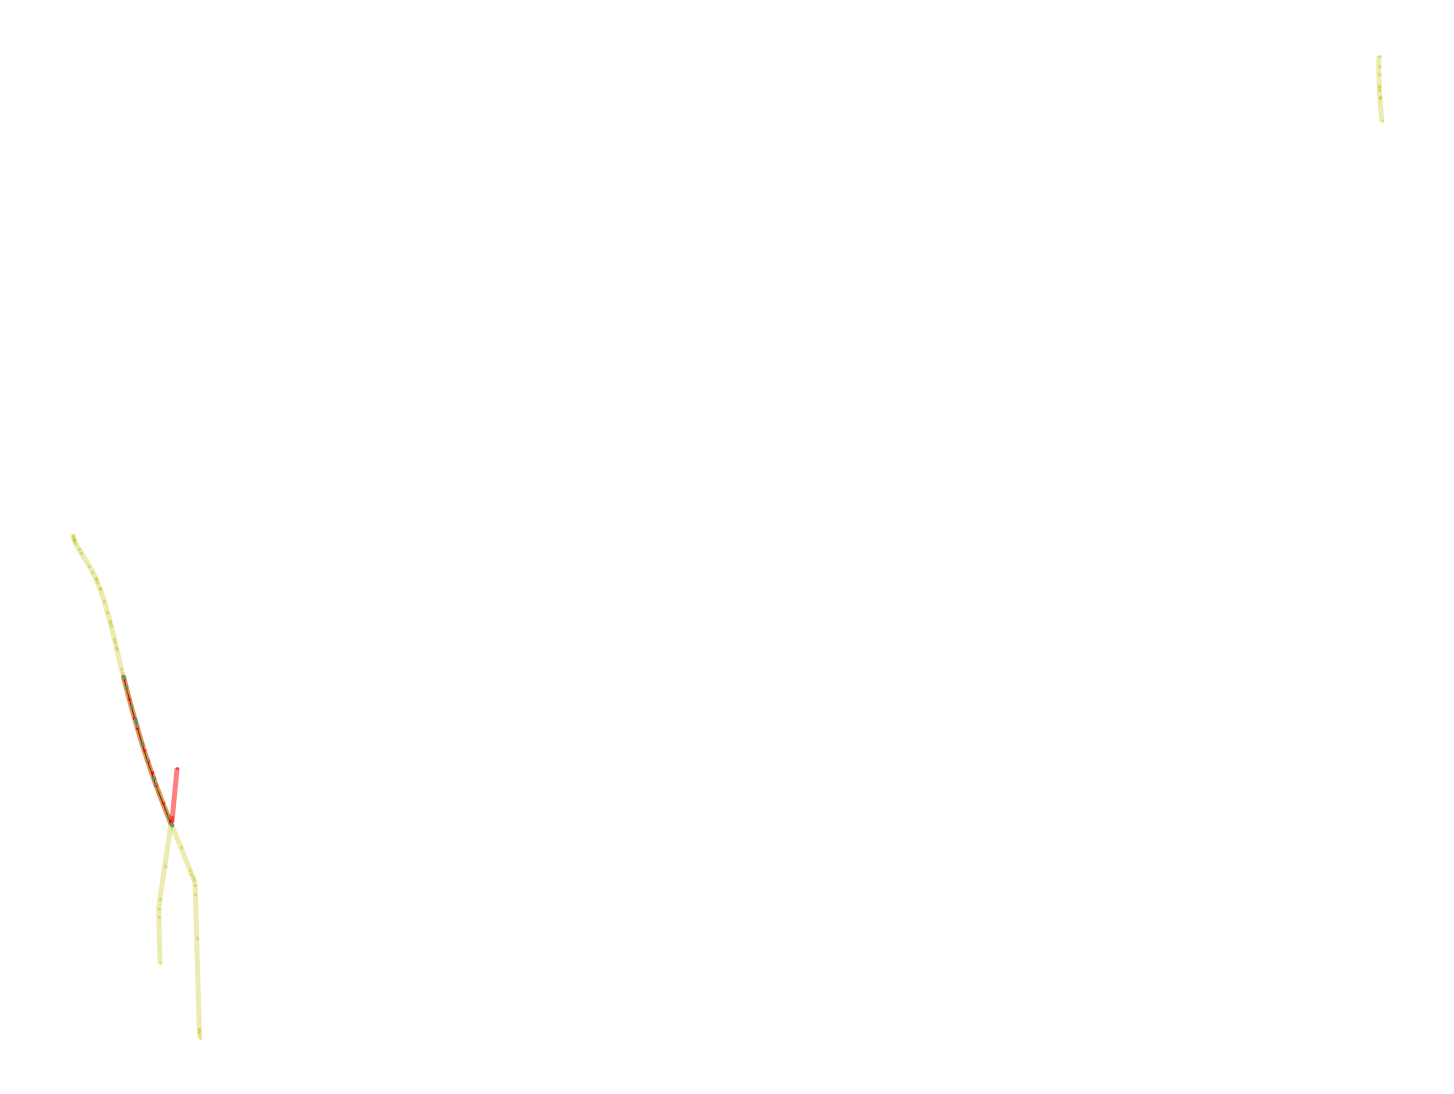

In [8]:
VERTICES_BIKES_PATH = Path('../bike/test/vertices_test_bikes.csv')
EDGES_BIKES_PATH = Path('../bike/test/edges_test_bikes.csv')

VERTICES_ROADS_PATH = Path('../bike/test/vertices_test_roads.csv')
EDGES_ROADS_PATH = Path('../bike/test/edges_test_roads.csv')

bikes = Graph(VERTICES_BIKES_PATH, EDGES_BIKES_PATH)
roads = Graph(VERTICES_ROADS_PATH, EDGES_ROADS_PATH)

snapped = snap_vertices(roads, deepcopy(bikes))

pos_bikes = {int(id): (v.x, v.y) for id, v in bikes.vertices_by_id.items()}
pos_roads = {int(id): (v.x, v.y) for id, v in roads.vertices_by_id.items()}
pos_snapped = {int(id): (v.x, v.y) for id, v in snapped.vertices_by_id.items()}

plt.figure(figsize=(20,15))
nx.draw(bikes.nx_graph, pos_bikes, node_size=5, width=5, alpha=0.5, node_color='r', edge_color='r')
nx.draw(snapped.nx_graph, pos_snapped, node_size=5, width=1)
nx.draw(roads.nx_graph, pos_roads, node_size=5, width=5, alpha=0.3, node_color='y', edge_color='y')
plt.show()

In [9]:
snapped_roads_ids = get_snapped_ids(snapped)

In [10]:
roads = smooth_graph(roads, 135, snapped_roads_ids)

100%|██████████| 50/50 [00:00<?, ?it/s]


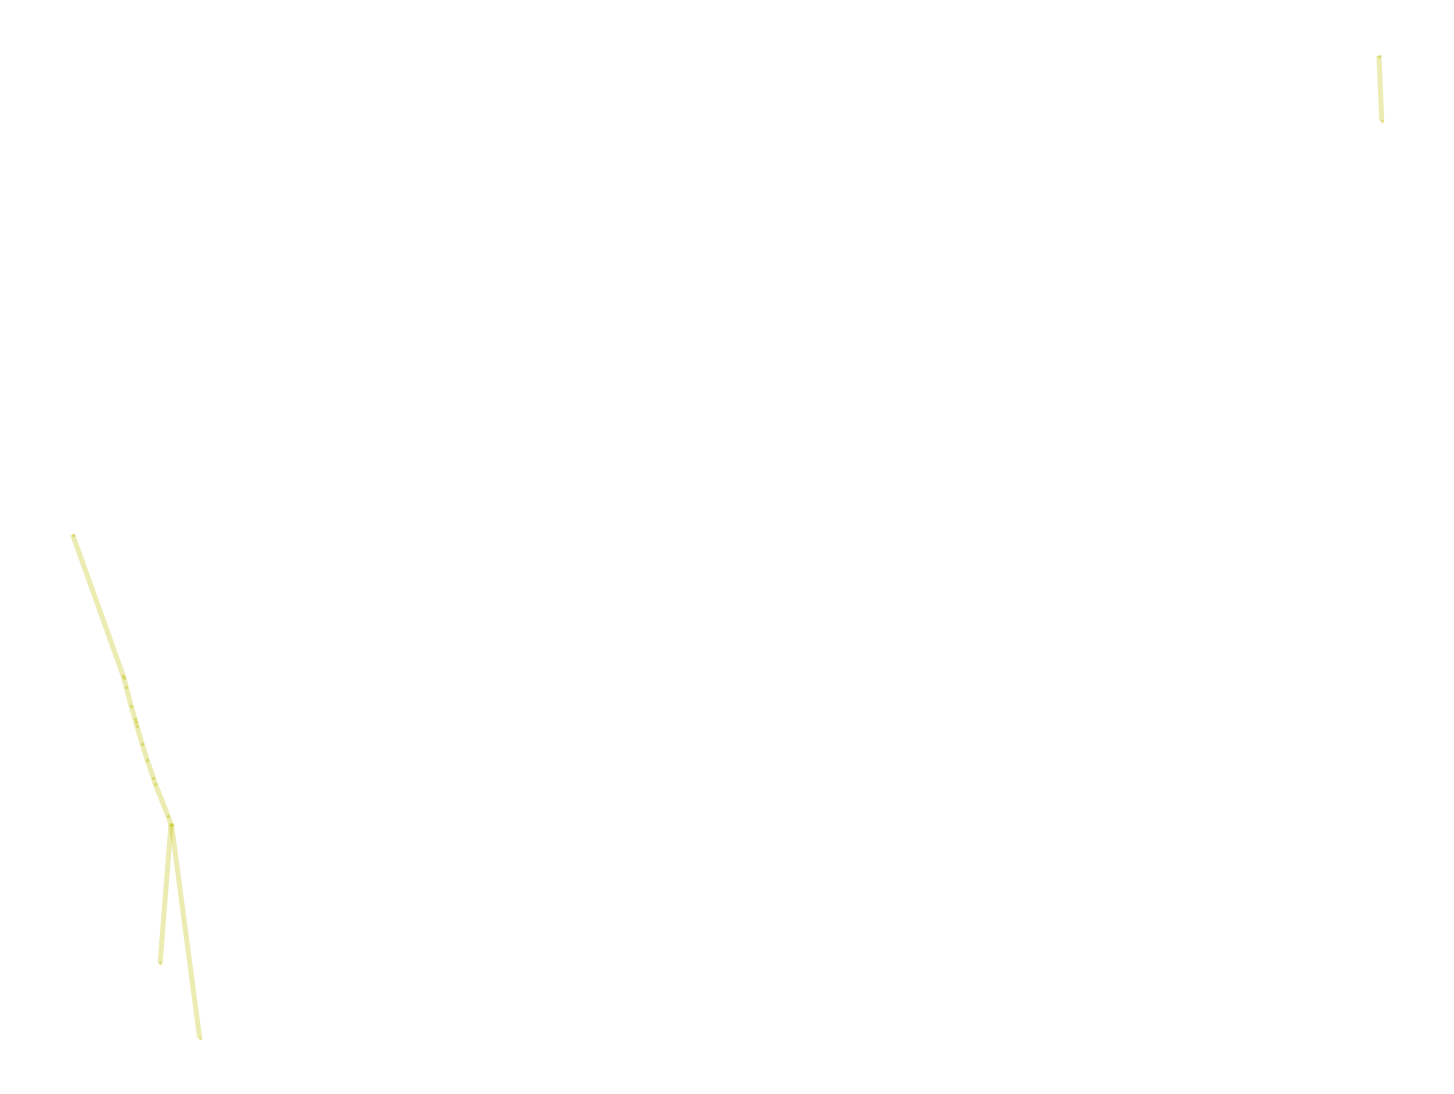

In [11]:
plt.figure(figsize=(20,15))
nx.draw(roads.nx_graph, pos_roads, node_size=5, width=5, alpha=0.3, node_color='y', edge_color='y')

In [12]:
roads = remove_snapped(roads, snapped_roads_ids)

100%|██████████| 17/17 [00:00<?, ?it/s]


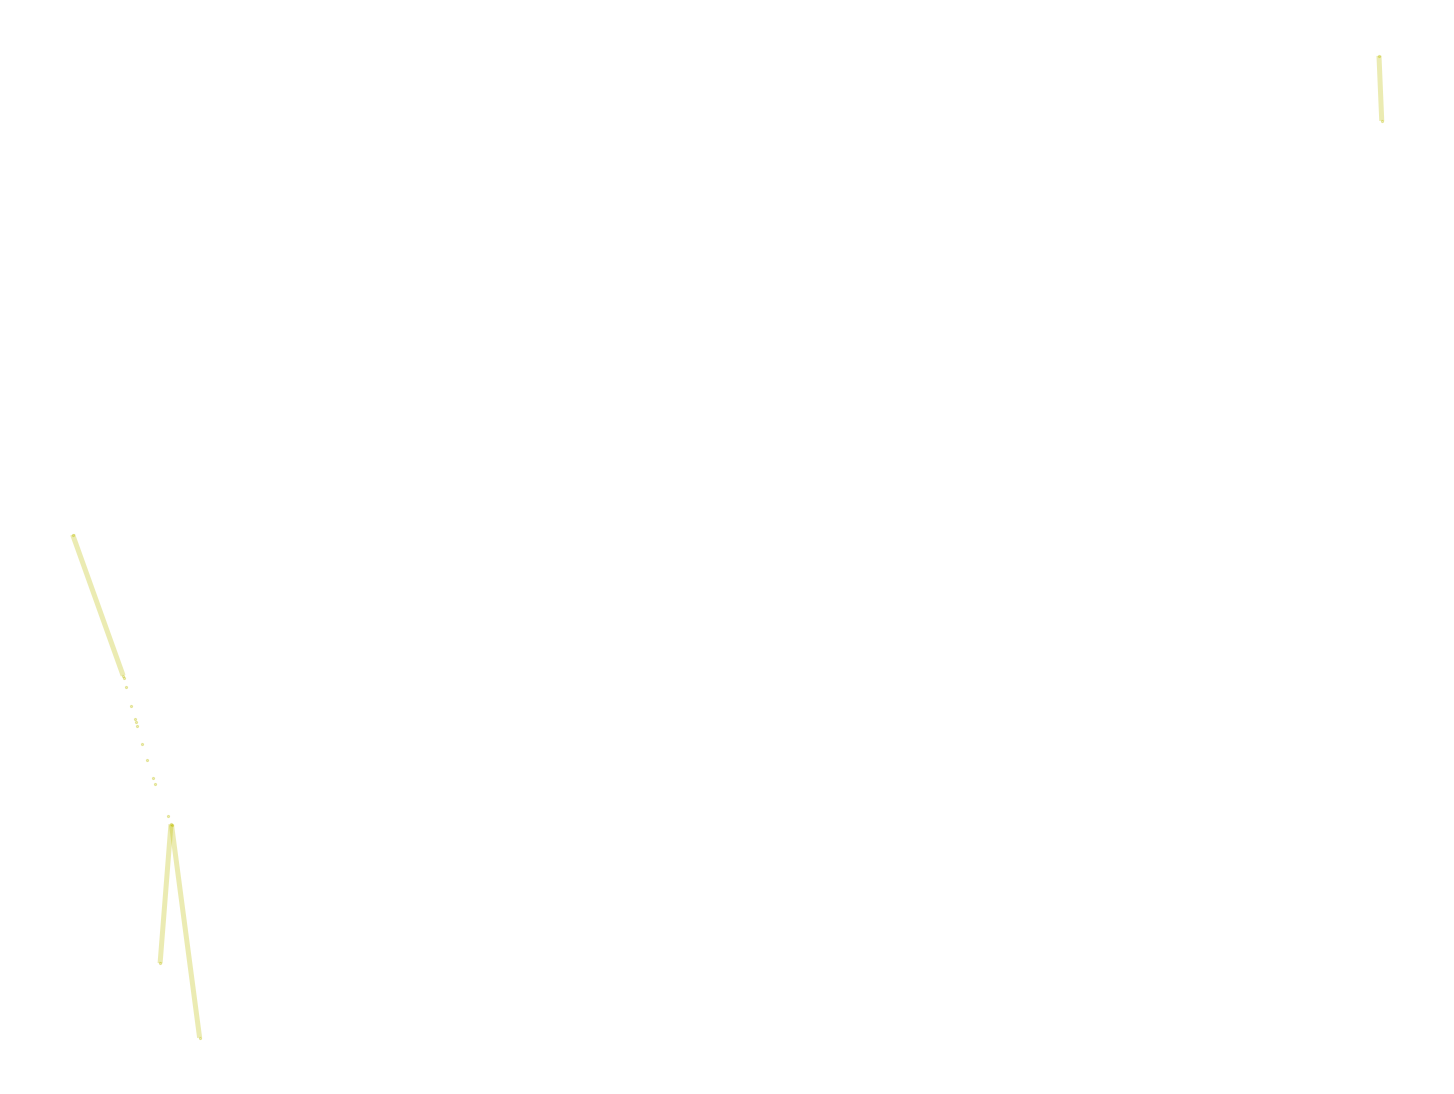

In [13]:
plt.figure(figsize=(20,15))
nx.draw(roads.nx_graph, pos_roads, node_size=5, width=5, alpha=0.3, node_color='y', edge_color='y')